# Backpropagation Notebook
Design Your Own Adventure Project: QEA Spring 2018  
Hwei-Shin Harriman

In [6]:
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
import copy

In [7]:
def sigmoid(aj):
    #Calculates the sigmoid function using logistic
    return 1 / (1 + np.exp(-aj))

In [8]:
def sigPrime(z):
    return (z * (1 - z))

In [9]:
def calcAj(weights, prevLayerOut):    
    #Calculates the sum of the weights and outputs from previous 
    #prevLayerOut and weights must be np arrays
    #weights should be one ROW of the weights matrix
    #prevLayerOut should be a ROW vector
    return np.dot(weights, prevLayerOut)

In [10]:
#given matrix of weights, number of nodes per hidden layer,
#and an input vector of data, propagate forward for one layer

def calcLayerOutputs(inputVec, weights):
    #define vector of output activations for all units in current layer
    
    return sigmoid(np.matmul(weights, inputVec))

In [11]:
def sumOfSquareError(netOutput, target):
    #Takes 2 vectors of same dimensions, returns the sum-of-squares error
    return 0.5 * np.sum(np.power(netOutput - target, 2))

In [12]:
def calcDelta(netOutput, target):
    #Takes 2 np arrays, all activations from forward prop and actual target
    #returns delta value for each output neuron
    #assumes netOutput's last entry is activations of output layer
    sigOutk = []
    guesses = netOutput[-1]
    for k in range(len(guesses)):
        sigOutk.append(sigPrime(guesses[k]))
    return np.asarray(sigOutk) * (guesses - target)

In [13]:
#neuronsPerLayer = array with number of neurons in each hidden/output layer
def forwardprop(inputVec, weights):
    #calculates outputs for all neurons in network
    activations = [inputVec]
    
    #dynamically calculates activations for all nodes in network
    for layer in range(len(weights)):
        weightsInLayer = weights[layer]
        
        #calculates all activations for current layer
        layerActivations = calcLayerOutputs(activations[layer], weightsInLayer[:, :])
            
        #adds resulting np array to list
        activations.append(layerActivations)
    #should be number of layers * j (neurons per layer) activations
    return activations

In [14]:
def backprop(activations, weights, deltaK):
    #calculates deltas for hidden units
    allDeltas = [deltaK]

    # The index goes from n-2 to 0.
    # The deltas vectors are indexed like the list of weight matrices.
    # The deltas for n-1 (the last weight matrix) are already computed.
    for layer in range(len(weights) - 2, -1, -1):
        #fetches activations from previous layer
        zj = activations[layer + 1] #Using the activations of the next layer
        weightsInLayer = weights[layer + 1] #and the weights of the next layer
        
        #one matrix-vector multiplication and one element-wise vector multiplication
        deltaJs = np.matmul(np.transpose(weightsInLayer), allDeltas[0]) * sigPrime(zj)
        
        #builds list of deltas to have same indexing as weights matrix
        allDeltas.insert(0, deltaJs)

    return allDeltas

In [15]:
#testing functionality of forward propagation

#generate random vector and weight matrix
inputVec = np.random.rand(10)
numLayers = 3
weightMatrix = []
for layer in range(numLayers):
    weightMatrix.append(np.random.randn(10, 10))
activations = forwardprop(inputVec, weightMatrix)

#first entry of activations is the input vector
print(activations)

[array([0.49212461, 0.21942416, 0.71712903, 0.26395214, 0.73966679,
       0.44134703, 0.42889014, 0.0880978 , 0.53753998, 0.15639339]), array([0.13735261, 0.75342846, 0.31300696, 0.57476135, 0.03647972,
       0.91471387, 0.86094342, 0.8368227 , 0.58216637, 0.7184479 ]), array([0.85313609, 0.09340098, 0.68216502, 0.76245707, 0.25120394,
       0.24223824, 0.87069691, 0.11923708, 0.6880151 , 0.05653658]), array([0.02543523, 0.76619604, 0.05068224, 0.67236701, 0.03597486,
       0.42357209, 0.11913358, 0.25631686, 0.89895854, 0.20773777])]


In [16]:
#test functionality of deltas function
targets = np.array([0., 0., 0., 1., 1., 1. , 0., 0., 1., 0.])

deltas = calcDelta(activations, targets)
deltas

array([ 0.0006305 ,  0.1372561 ,  0.0024385 , -0.07217415, -0.03343304,
       -0.14073993,  0.01250197,  0.04885874, -0.00917781,  0.03419006])

In [17]:
#test functionality of backprop
alldeltas = backprop(activations, weightMatrix, deltas)
alldeltas

[array([ 0.00302353, -0.00957438,  0.0019113 , -0.0231598 ,  0.00051532,
         0.0011216 ,  0.00622317,  0.01219558,  0.03402735, -0.01371702]),
 array([ 0.00385517,  0.00302471,  0.05296329,  0.01143838,  0.00582067,
        -0.03279564,  0.0042119 , -0.01743569, -0.0365394 ,  0.00705376]),
 array([ 0.0006305 ,  0.1372561 ,  0.0024385 , -0.07217415, -0.03343304,
        -0.14073993,  0.01250197,  0.04885874, -0.00917781,  0.03419006])]

In [38]:
def calcGradient(learningRate, deltas, activations, weights):
    #for each layer, for each weight @ every node, calculate the gradient
    gradient = []
    for layer in range(len(weights) -1, -1, -1):
        deltaKs = deltas[layer]
        outJs = activations[layer]
        weightDims = weights[layer]
        
        #pre-allocate array to fill with gradient values. Annoyingly defined by [0] * columns * rows
        weightsInLayer = np.array([[0.] * weightDims.shape[1]] * weightDims.shape[0])

        for k in range(len(deltaKs)):
            for j in range(len(outJs)):
                #Note: [k, j] row by column. Think of matrix multiplication.
                weightsInLayer[k,j] =  learningRate * deltaKs[k] * outJs[j]
        
        gradient.insert(0, weightsInLayer)
    return gradient
updatedW = calcGradient(.001, alldeltas, activations, weightMatrix)
updatedW

[array([[ 1.48795167e-06,  6.63434693e-07,  2.16825841e-06,
          7.98066213e-07,  2.23640194e-06,  1.33442432e-06,
          1.29676057e-06,  2.66365996e-07,  1.62526624e-06,
          4.72859511e-07],
        [-4.71179047e-06, -2.10085134e-06, -6.86606931e-06,
         -2.52717937e-06, -7.08185455e-06, -4.22562636e-06,
         -4.10635924e-06, -8.43482206e-07, -5.14661471e-06,
         -1.49737050e-06],
        [ 9.40595517e-07,  4.19384385e-07,  1.37064542e-06,
          5.04490512e-07,  1.41372174e-06,  8.43544558e-07,
          8.19735750e-07,  1.68380913e-07,  1.02739771e-06,
          2.98913966e-07],
        [-1.13975056e-05, -5.08181870e-06, -1.66085619e-05,
         -6.11307767e-06, -1.71305319e-05, -1.02215072e-05,
         -9.93300802e-06, -2.04032697e-06, -1.24493163e-05,
         -3.62203896e-06],
        [ 2.53599275e-07,  1.13072595e-07,  3.69547460e-07,
          1.36018539e-07,  3.81161512e-07,  2.27432817e-07,
          2.21013590e-07,  4.53981299e-08,  2.770025

In [19]:
def updateWeights(learningRate, deltas, activations, weights):
    #calculate the gradient
    gradComponents = calcGradient(learningRate, deltas, activations, weights)
    
    #update all of the weights based on the gradient
    newWeights = []
    for layer in range(len(weights)):
        weightsInLayer = weights[layer]
        gradInLayer = gradComponents[layer]
        
        #subtract the gradient components from the weights
        newWeights.append(weightsInLayer - gradInLayer)
    return newWeights
newWeights = updateWeights(.001, alldeltas, activations, weightMatrix)

In [20]:
#PS
def gradientCheck(weights, inputVec, target):
    # weights is the list of weight matrices
    # inputVec and target is a single training pair

    # Compute error and gradient with current weights
    activations = forwardprop(inputVec, weights)
    deltaK = calcDelta(activations, target)
    deltas = backprop(activations, weights, deltaK)
    gradComponents = calcGradient(1, deltas, activations, weights)
    error = sumOfSquareError(activations[-1], target)
    
    # Check each component of the gradient via numerical differentiation
    # WARNING: Very slow
    eps = 1e-9
    for layer in range(len(weights)):
        for j in range(weights[layer].shape[0]):
            for k in range(weights[layer].shape[1]):
                # Add / subtract a small number to the current weight
                weights1 = copy.deepcopy(weights)
                weights2 = copy.deepcopy(weights)
                weights1[layer][j, k] += eps
                weights2[layer][j, k] -= eps
                
                # Compute the new error
                activations1 = forwardprop(inputVec, weights1)
                activations2 = forwardprop(inputVec, weights2)
                error1 = sumOfSquareError(activations1[-1], target)
                error2 = sumOfSquareError(activations2[-1], target)
                
                # Check gradient component vs central difference
                numGrad = (error1 - error2) / (2*eps)
                grad = gradComponents[layer][j, k]
                if (abs(grad - numGrad) > 1e-4):
                    print("[", layer, ", ", j, ", ", k, "]")
                    print("ERROR: Wrong gradient component")
                    print("Should be ", numGrad)
                    print("Is ", grad)

2 (10,)


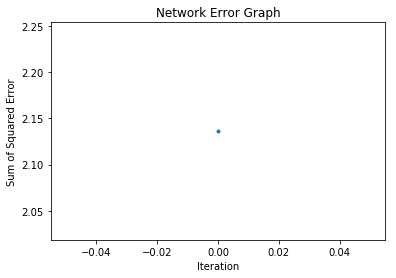

last guess:  [0.60819056 0.97116087 0.56778668 0.9828804  0.29542844 0.06901541
 0.22538471 0.01354051 0.31529595 0.86809217]
actual vector:  [0. 0. 0. 1. 1. 1. 0. 0. 1. 0.]
difference:  [ 0.60819056  0.97116087  0.56778668 -0.0171196  -0.70457156 -0.93098459
  0.22538471  0.01354051 -0.68470405  0.86809217]


2.1361313150912724

In [40]:
def trainNetwork(patterns, learningRate, neuronsPerLayer, targets):
    #Randomly initialize all weights in network
    weights = []
    errors = []
    #Note: Think of multiplying a weight matrix with an activation vector.
    for layer in range(len(neuronsPerLayer) - 1):
        weights.append(np.random.randn(neuronsPerLayer[layer + 1], neuronsPerLayer[layer]))
    
    #Initialize error plot
    fig, ax = plt.subplots()
    
    #Loop through all input vectors, train the network, plot the error
    for p in range(len(patterns)):
        #PS: Enable this to check if the forward and backward pass are still consistent.
        #    Warning, it's very slow. Use a small network.
        #gradientCheck(weights, patterns[p], targets[p])
        
        #forward pass through network, find all activations
        activations = forwardprop(patterns[p], weights)
        
        #calculate deltas at output layer
        deltaK = calcDelta(activations, targets[p])
        
        #calculate rest of deltas with backpropagation
        allDeltas = backprop(activations, weights, deltaK)
        
        
        #update weights
        weights = updateWeights(learningRate, allDeltas, activations, weights)
        
        #calculate network error
        error = sumOfSquareError(activations[-1], targets[p])
        
        #add to list of errors
        errors.append(error)
        
    print(len(allDeltas), allDeltas[1].shape)
    #plot the error
    ax.plot(errors, marker= '.')
    ax.set(xlabel = 'Iteration', ylabel= 'Sum of Squared Error', title= 'Network Error Graph')
    plt.show()
    
    print("last guess: ", activations[-1])
    print("actual vector: ", targets[-1])
    print("difference: ", (activations[-1] - targets[-1]))
    return error
trainNetwork([inputVec], .001, [10, 10, 10], [targets])

2 (10,)


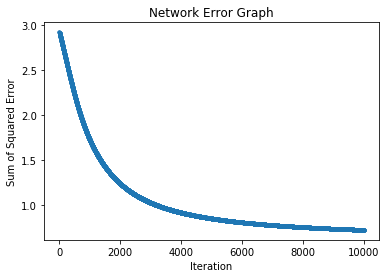

last guess:  [0.9499698  0.90622322 0.95665517 0.16233606 0.25125983 0.12204846
 0.0510888  0.97500708 0.94246423 0.62258957]
actual vector:  [ 1.56707284  1.10207071  0.85126658  0.08150434  0.29511758  0.01336174
 -0.38635799  1.80230814  1.29502889  0.60113782]
difference:  [-0.61710304 -0.19584749  0.10538859  0.08083173 -0.04385775  0.10868672
  0.43744679 -0.82730106 -0.35256466  0.02145175]


0.725548993820155

In [25]:
#test with dummy data
num_tests = 10000
inputData = []
targetData = []

vec = np.random.randn(10)
#Generate data where targets are the same as the input vectors
for test in range(num_tests):
    inputData.append(vec)
    targetData.append(vec)

#moment of truth let's gooo
trainNetwork(inputData, .001, [10, 10, 10], targetData)

## MNIST Feed-Forward Implementation

Feed-forward neural network with one input layer, one hidden layer with 625 units, and one output layer of 10 units. Logistic sigmoid function is used as the activation function for all layers, error function is sum-of-squared. Learning rate is currently .05, stochastic gradient descent is not implemented. Takes a while to run, so only use the small MNIST dataset. See Softmax notebook for implementation of epochs, softmax transfer and cross entropy error.

In [23]:
def make_dataset(trainfile, testfile):
    #Takes name of training set and test set, breaks into input vectors and targets
    #Initializes arrays that will contain data set
    imgtr = []
    tartr = []
    imgte = []
    tarte = []
    numOutputs = 10
    
    #Opens training data set
    fd = open(trainfile, 'r')
    loaded = fd.readlines()
    fd.close()
    
    fdtr = open(testfile, 'r')
    loadedtr = fdtr.readlines()
    fdtr.close()

    #Pre-process the training data set
    for line in loaded:
        #reset options
        opt = np.array([0.] * numOutputs)

        #split off classification from input array
        linebits = line.split(',')
        imgtr.append(np.asfarray(linebits[1:])/255)  #currently (784,1) on intensity scale 0-1reshape((28,28))

        #classify from 0-9
        opt[int(linebits[0])] = 1.
        tartr.append(opt)
    print(len(imgtr), len(imgtr[0]), len(tartr), tartr[-1], linebits[0])
    
    #Same thing for test data set
    for line in loadedtr:
        opt = np.array([0.] * numOutputs)
        
        linebits = line.split(',')
        imgte.append(np.asfarray(linebits[1:])/255)
        

        opt[int(linebits[0])] = 1.
        tarte.append(opt)
    print(len(imgte), len(imgte[0]), len(tarte), tarte[-1], linebits[0])
    return imgtr, tartr, imgte, tarte
imgtr, tartr, imgte, tarte = make_dataset("mnist_train_100.csv", "mnist_test_10.csv")

100 784 100 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] 1
10 784 10 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] 9


3 (625,)


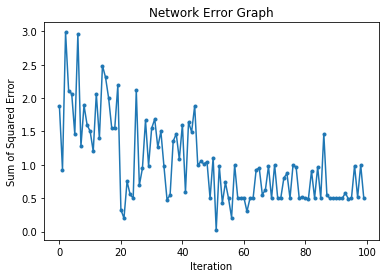

last guess:  0
actual vector:  1
difference:  [ 5.42852903e-03 -9.99829403e-01  2.28944178e-11  2.04697627e-08
  4.53466588e-03  1.69506932e-07  1.96141484e-06  3.63521167e-15
  5.02029163e-15  8.62860635e-10]


0.49985443396417206

In [39]:
trainNetwork(imgtr, .05, [784, 625, 625, 10], tartr)